### Introductory simulations
In this first part i will attempt to understand and characterize a few simple systems

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML
import pandas as pd
from scipy.stats import gaussian_kde

plt.style.use('../sim.mplstyle')
%config InlineBackend.figure_format = 'retina'

### function for data extraction

In [3]:
def get_data(name_file):
    global N 
    lines = pd.read_csv(name_file, names = list(range(3)), sep = '\s+')
    N = int(lines.iloc[0,0])
    s = N*3+3

    t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

    m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
    x = np.array([lines.iloc[i::s].copy().dropna() for i in range(N+3, 2*N+3)])
    v = np.array([lines.iloc[i::s].copy().dropna() for i in range(2*N+3, 3*N+3)])
    
    print('Loaded %.0e particles' %N)
    
    return t,m,x,v

### plot functions

In [4]:
def static_positions(t_i, l, a=.5):
    fig, axs = plt.subplots(1,3, figsize = (9,9), tight_layout = True)
    for i in range(3):
        axs[i].set(aspect='equal', xlim = [-l,l], ylim = [-l,l], title = fr'time = {round(t[t_i],2)}')
        axs[i].grid()

        
    # Calculate the point density
    xy = np.vstack([x[:,t_i], y[:,t_i]])
    xz = np.vstack([x[:,t_i], z[:,t_i]])
    yz = np.vstack([y[:,t_i], z[:,t_i]])

    bw = .1
    k = [gaussian_kde(data, bw_method=bw)(data) for data in [xy, xz, yz]]
    
    #don't get fooled by shape! the first entry are the particles not the time!
    axs[0].scatter(x[:,t_i], y[:,t_i], s = .5, c = k[0], alpha=a)
    axs[0].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1].scatter(x[:,t_i], z[:,t_i], s = .5, c = k[1], alpha=a)
    axs[1].set(xlabel = r'$x$', ylabel = r'$z$')
    axs[2].scatter(y[:,t_i], z[:,t_i], s = .5, c = k[2], alpha=a)
    axs[2].set(xlabel = r'$y$', ylabel = r'$z$')

In [44]:
def static_positions_3d(t_i, l, a=.5):
    fig = plt.figure()
    
    xyz = np.vstack([x[:,t_i], y[:,t_i],z[:,t_i]])
    bw = .1
    k = [gaussian_kde(xyz, bw_method=bw)(xyz)]
    
    ax = fig.add_subplot(aspect='equal', projection='3d',
                         xlim = [-l,l], ylim = [-l,l], zlim = [-l,l],
                         title = fr'time = {round(t[t_i],2)}')
    ax.scatter(x[:,t_i], y[:,t_i], z[:,t_i], s = .5, c = k, alpha=a)

### animations

In [219]:
def positions(t_i, is3d, l, a):
    if is3d:
        ax.clear()
        ax.set(xlim=[-l, l], ylim=[-l, l], zlim=[-l,l],
               title=fr'{N} particles, time = {round(t[t_i],2)}',
               aspect='equal')
        ax.grid()
        ax.scatter(x[:,t_i], y[:,t_i], z[:,t_i], s = .5, alpha=a)
        
    else:
        for i,_ in enumerate(axs):
            axs[i].clear()
            axs[i].set(xlim=[-l, l], ylim=[-l, l], aspect='equal')
            axs[i].grid()


        projections = [(x[:, t_i], y[:, t_i]), (x[:, t_i], z[:, t_i]), (y[:, t_i], z[:, t_i])]

        bw = 0.1
        k = [gaussian_kde(data, bw_method=bw)(data) for data in projections]

        labels = [(r'$x$', r'$y$'), (r'$x$', r'$z$'), (r'$y$', r'$z$')]
        titles = [fr'$xy$ projection, time = {round(t[t_i], 2)}',
                  fr'$xz$ projection, time = {round(t[t_i], 2)}',
                  fr'$yz$ projection, time = {round(t[t_i], 2)}']

        for i, (x_data, y_data) in enumerate(projections):
            axs[i].set_xlabel(labels[i][0])
            axs[i].set_ylabel(labels[i][1])
            axs[i].scatter(x_data, y_data, c=k[i], s=.5, alpha=a)
            axs[i].set_title(titles[i])

In [220]:
def animate(update, num_frames, is3d, l=10, a=.25):
    global fig, ax, axs
    
    if is3d:
        fig = plt.Figure()
        ax = fig.add_subplot(projection='3d')
    else:
        fig = plt.Figure(figsize=(11,4), tight_layout=True)
        axs = fig.subplots(1,3)

    ani = animation.FuncAnimation(fig, update, blit=True,
                                  frames=tqdm(range(num_frames)), fargs=(is3d,l,a))

    return ani


In [221]:
ani = animate(positions, is3d=False, num_frames=10, l=5)

HTML(ani.to_jshtml(fps=60))

  0%|          | 0/10 [00:00<?, ?it/s]

## Homogeneous sphere

In [9]:
t,m,pos,vel = get_data('../treecode/data/out_data.txt')

Loaded 1e+04 particles


In [10]:
x, y, z = [pos[:,:,i] for i in range(3)]
vx, vy, vz = [vel[:,:,i] for i in range(3)]

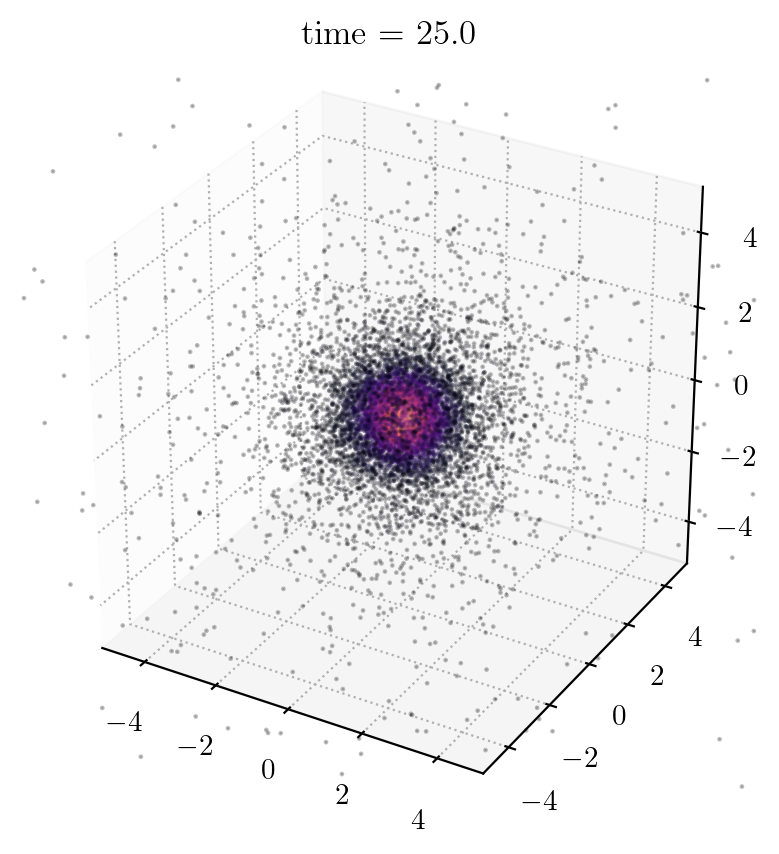

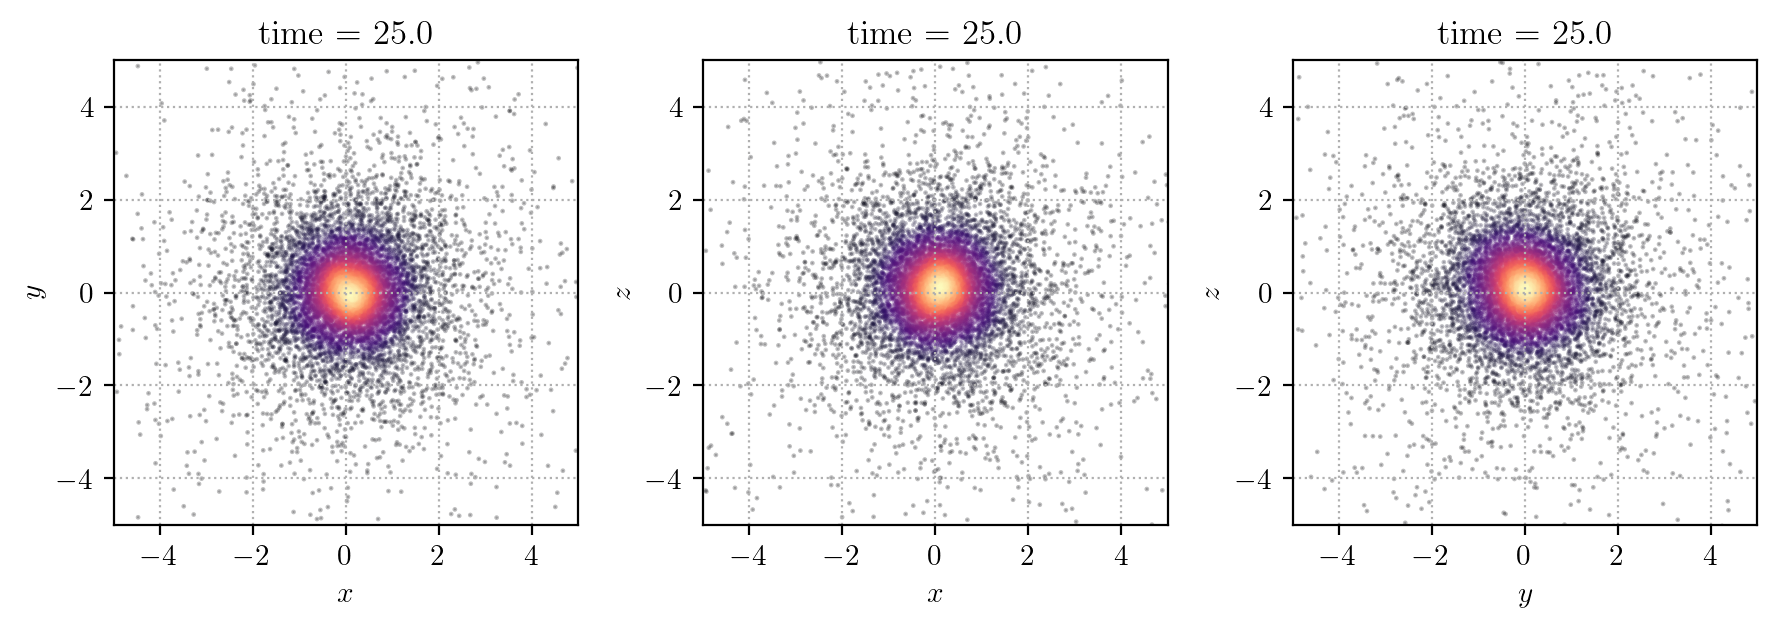

In [45]:
l = 5
frame = 400
static_positions_3d(frame, l,.25)
static_positions(frame, l,.25)